In [1]:


#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the dataset

df = pd.read_csv('/content/train.csv')

In [3]:
# The top 5 records of dataset

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Explore dataset properties

In [4]:
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


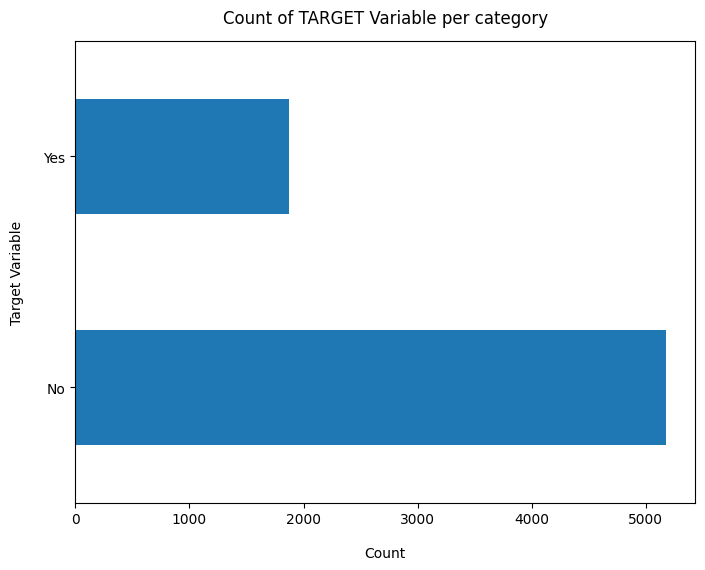

In [8]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [10]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
# as we have too many columns we are using the verbose = True mode
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# check for missing values 
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Data Cleaning

In [13]:
#Creating a copy of data 

df1 = df.copy()

In [14]:
#convert Total Charges to numerical datatype
df1.TotalCharges = pd.to_numeric(df1.TotalCharges, errors='coerce')
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
#Let's check missing values records in TotalCharges column. 
df1.loc[df1 ['TotalCharges'].isnull() == True]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
#Removing missing values 
df1.dropna(how = 'any', inplace = True)

Dividing customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [17]:
# Get the max tenure
print(df1['tenure'].max()) 

72


In [18]:
#Removeing columns not required 

#drop column customerID and tenure
df1.drop(columns= ['customerID'], axis=1, inplace=True)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data visualization

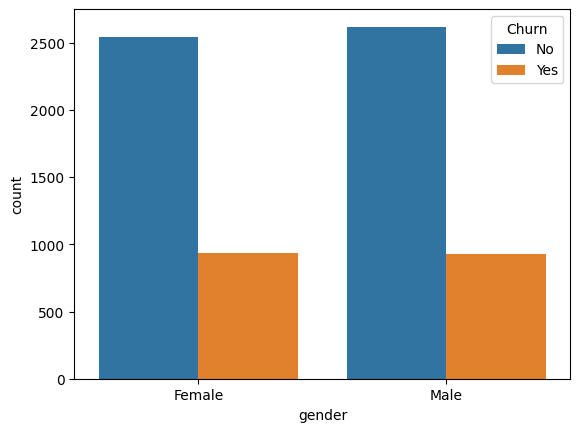

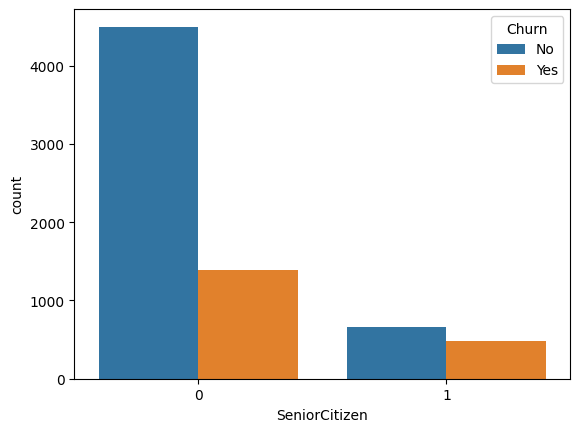

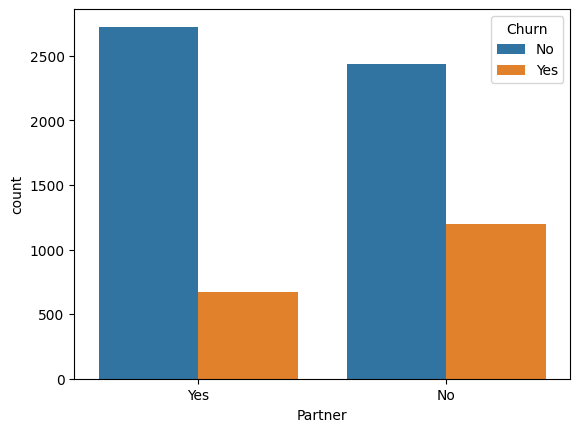

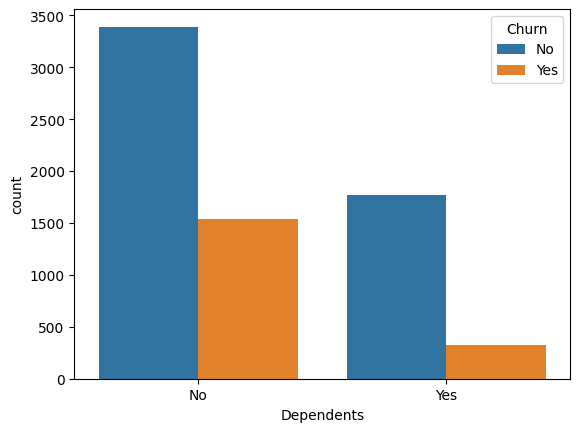

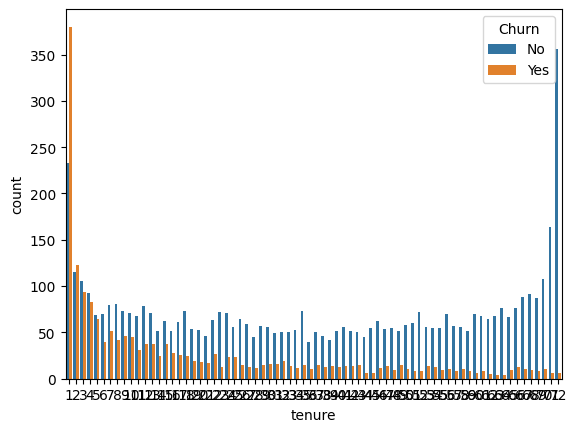

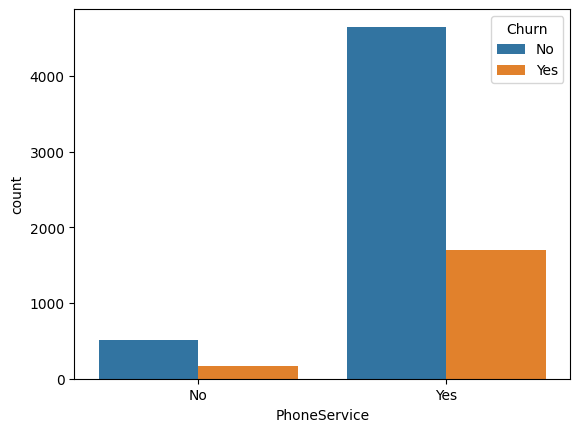

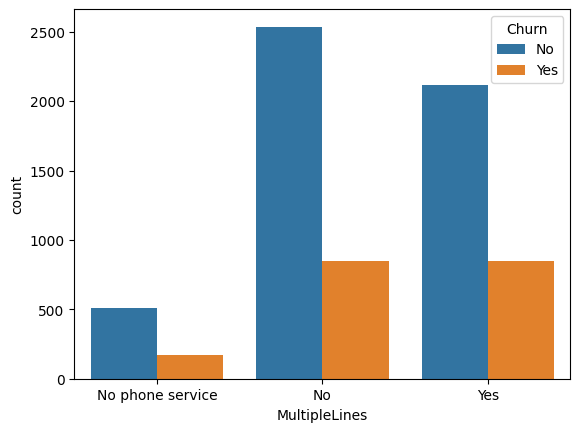

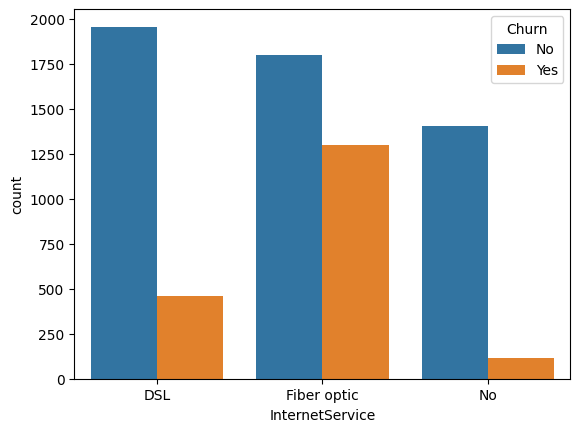

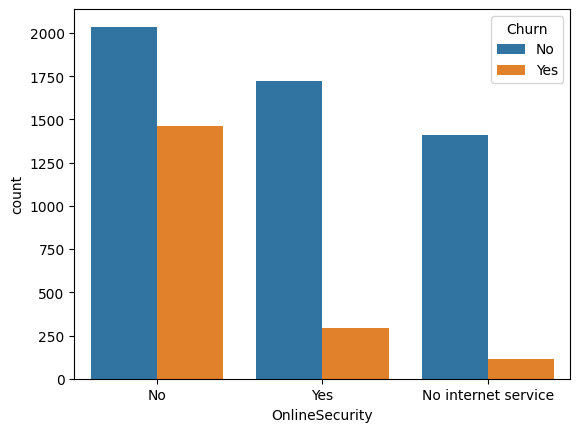

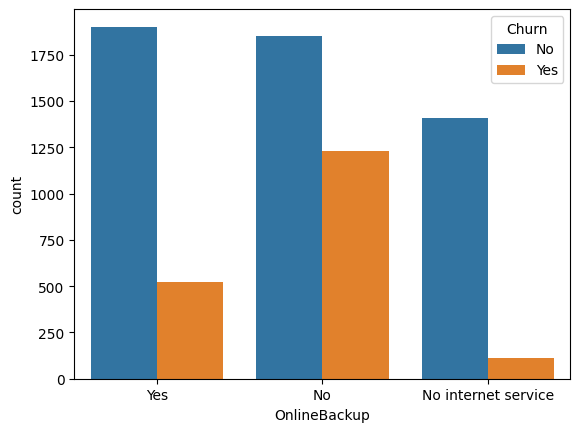

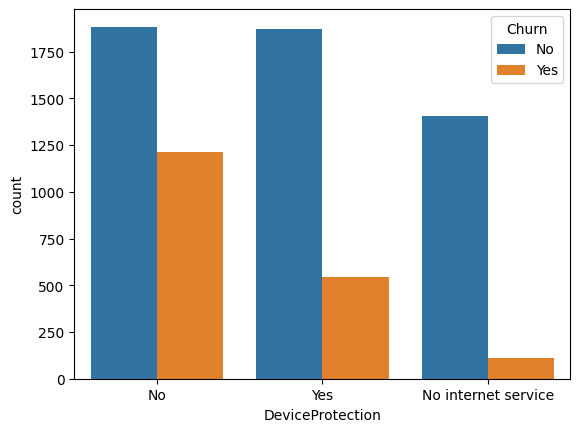

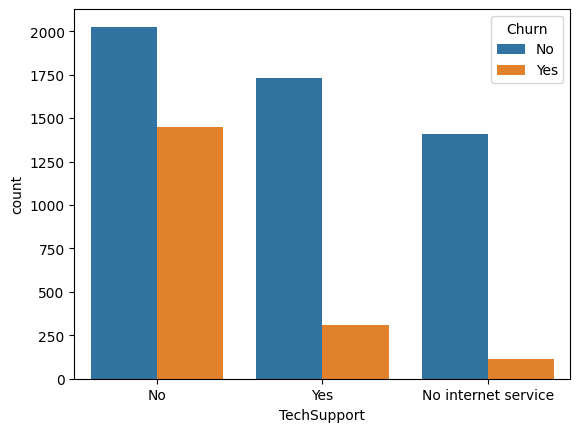

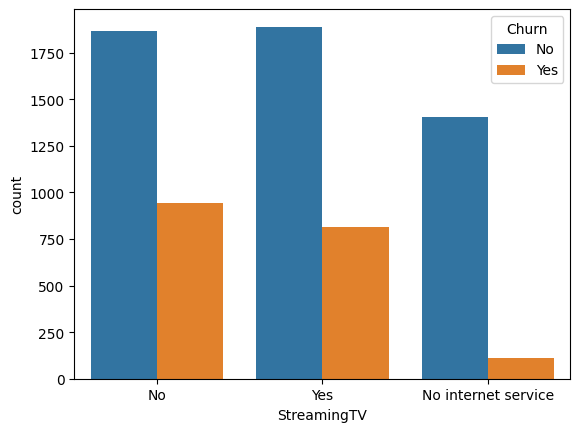

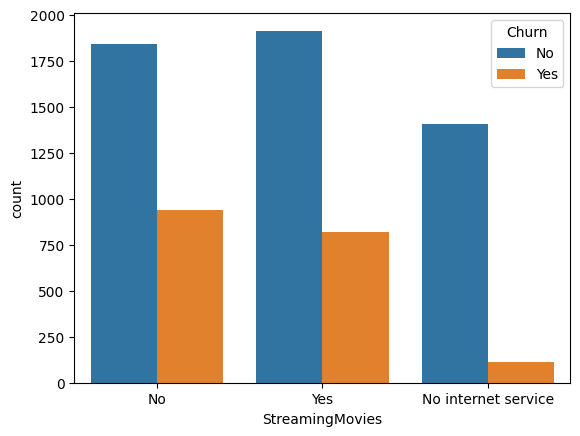

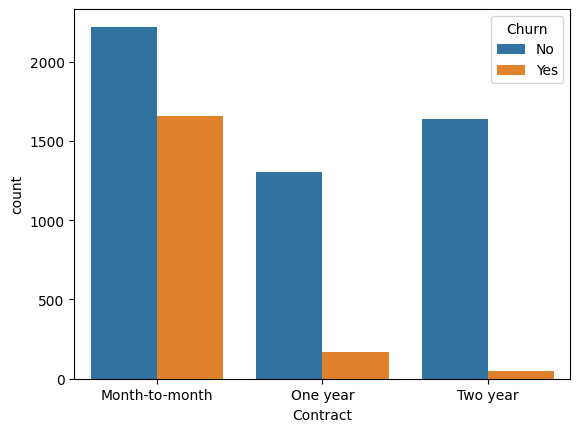

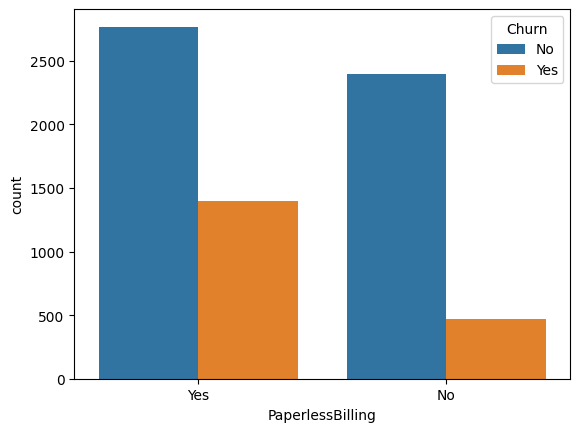

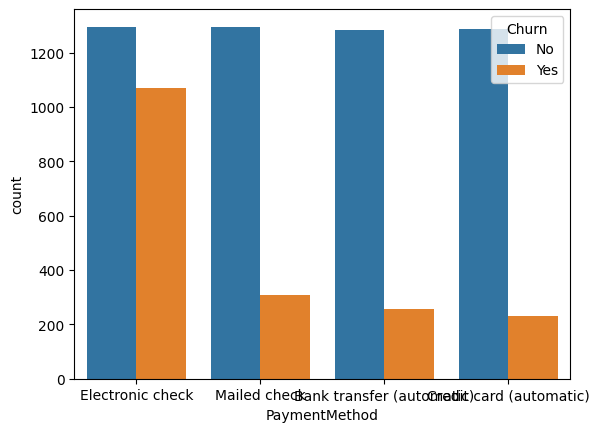

In [19]:
#Univariate Analysis
for i, predictor in enumerate(df1.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df1, x=predictor, hue='Churn')

In [20]:
 #Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0
 df1['Churn'] = np.where(df1.Churn == 'Yes',1,0)

In [21]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [22]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
               'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical = ['tenure_group', 'MonthlyCharges', 'TotalCharges']

In [23]:
from sklearn.preprocessing import LabelEncoder


In [24]:
for i in categorical:
    le = LabelEncoder()
    df1[i] = le.fit_transform(df1[i])

In [25]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


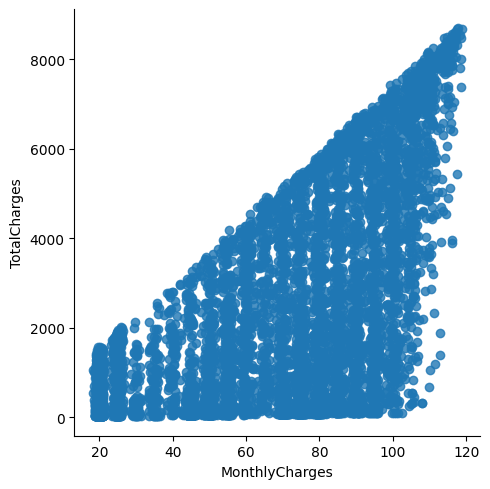

In [26]:
#Relationship between Monthly Charges and Total Charges

sns.lmplot(data=df1, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Text(0.5, 1.0, 'Monthly charges by churn')

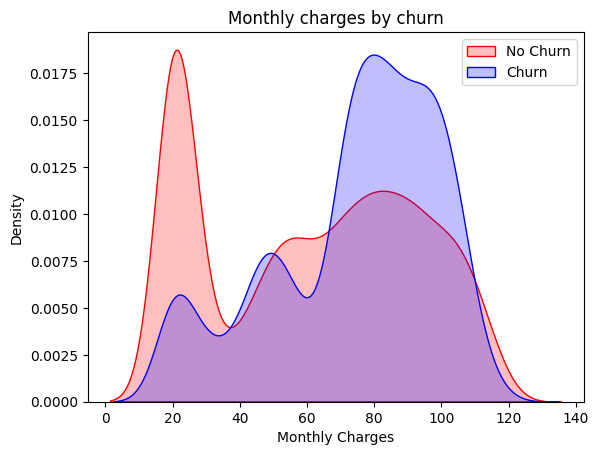

In [27]:
#Churn by Monthly Charges and Total Charges

Mth = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 0) ],
                color="Red", fill=True)
Mth = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 1) ],
                ax =Mth, color="Blue", fill=True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

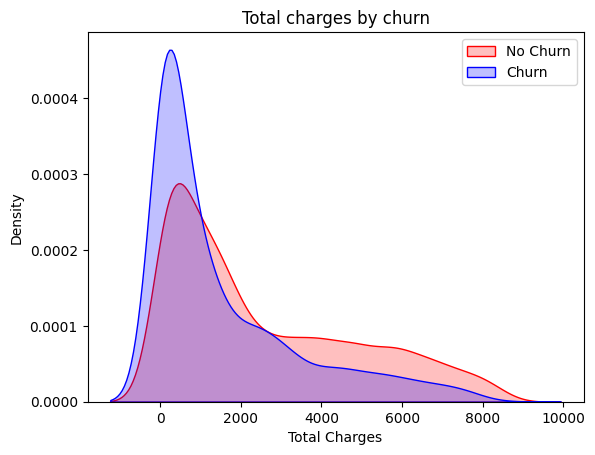

In [28]:
Tot = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 0) ],
                color="Red", fill=True)
Tot = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 1) ],
                ax =Tot, color="Blue", fill=True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

<Axes: >

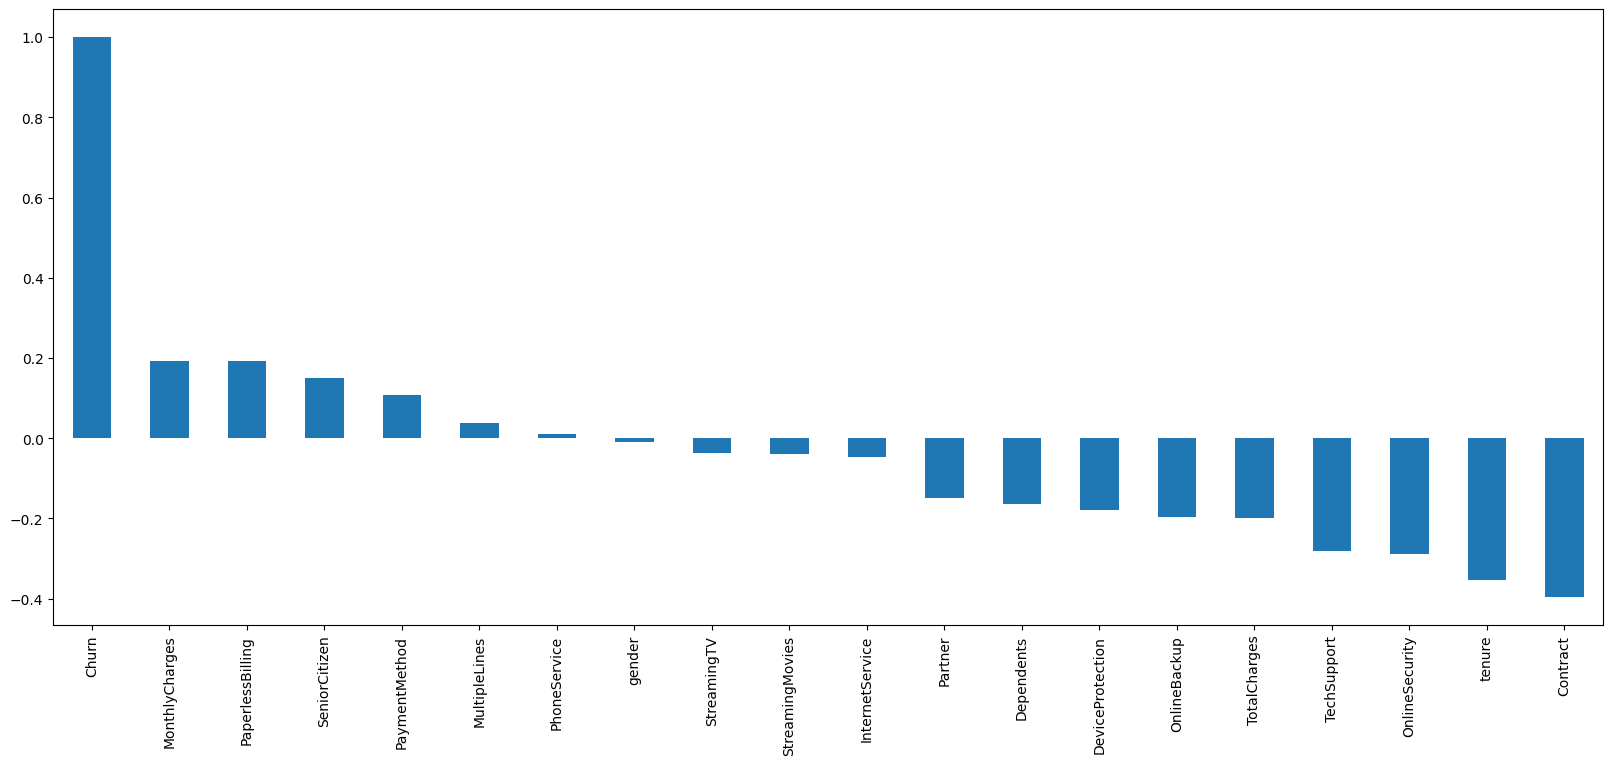

In [29]:
#Build a corelation of all predictors with 'Churn'

plt.figure(figsize=(20,8))
df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

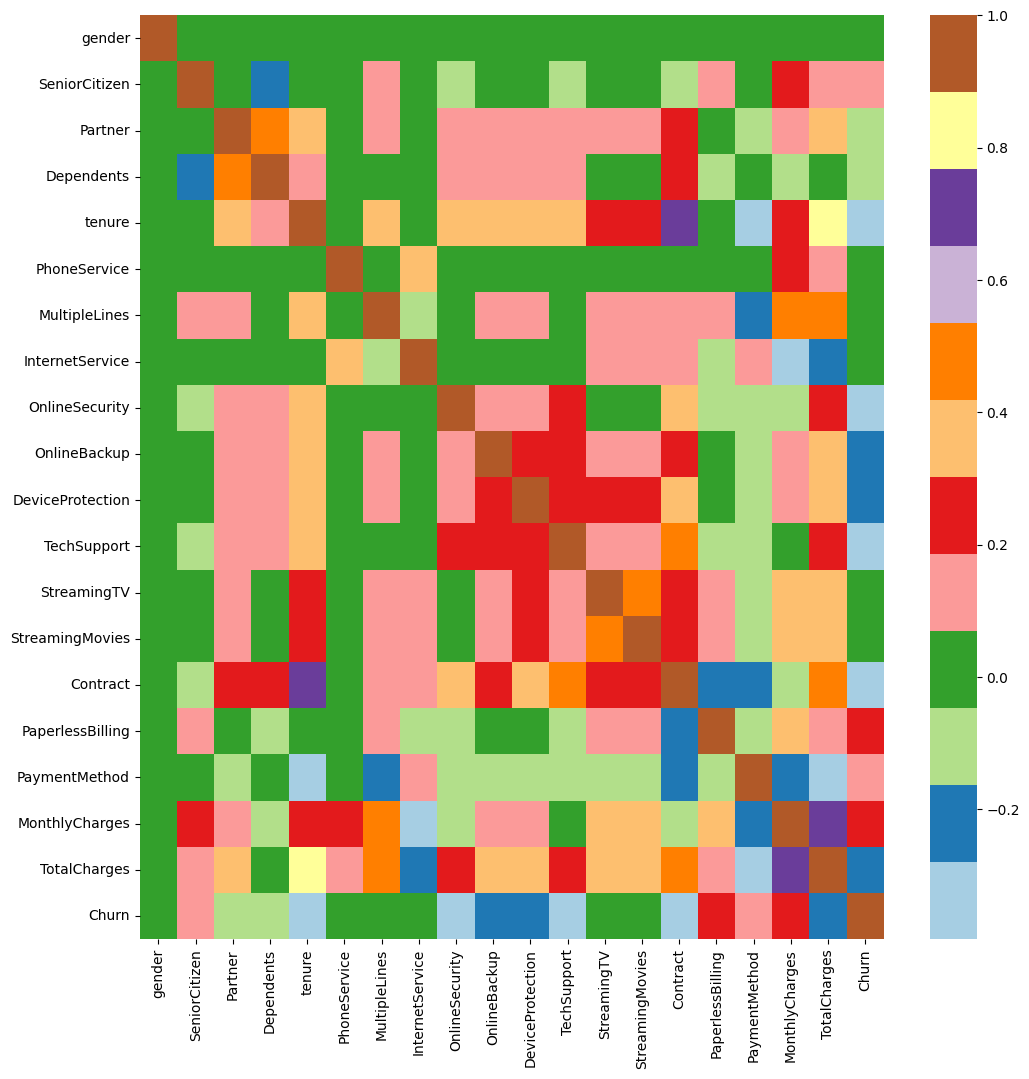

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), cmap="Paired")

Bivariate Analysis

In [31]:

new_df1_target0=df1.loc[df1["Churn"]==0]
new_df1_target1=df1.loc[df1["Churn"]==1]

In [32]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

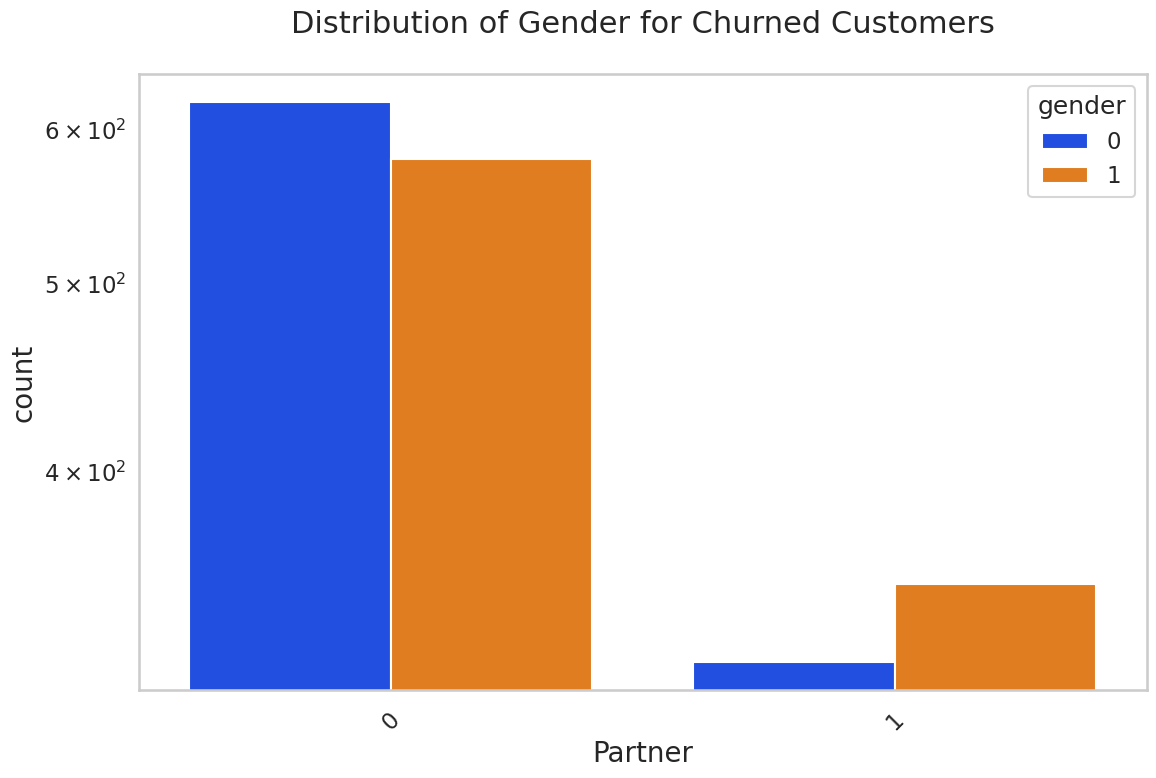

In [33]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

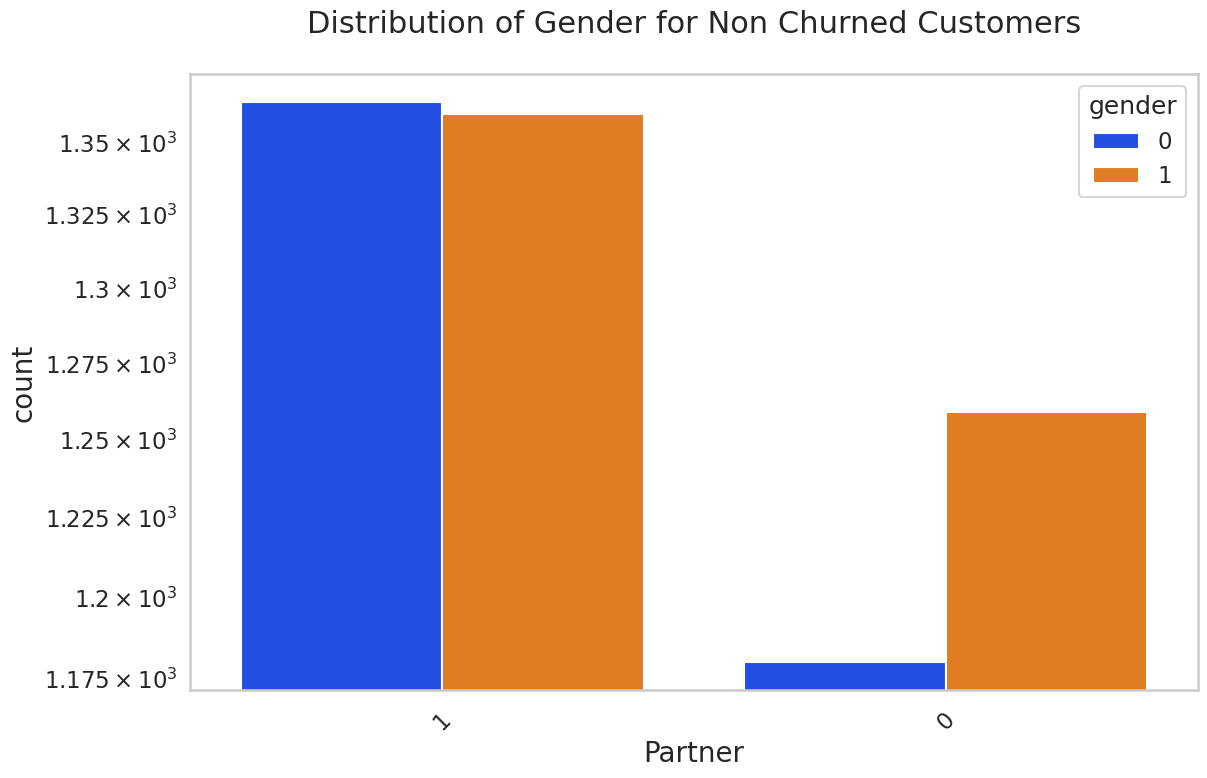

In [34]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

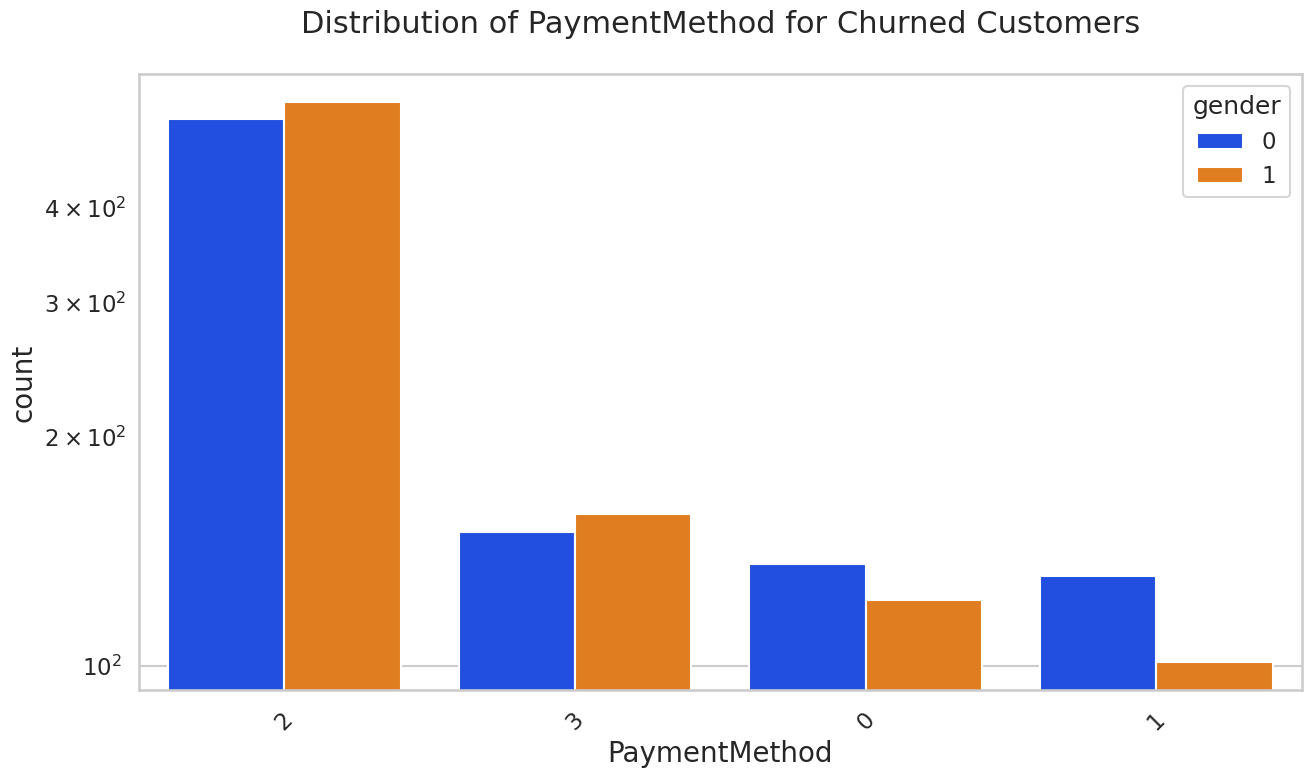

In [35]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

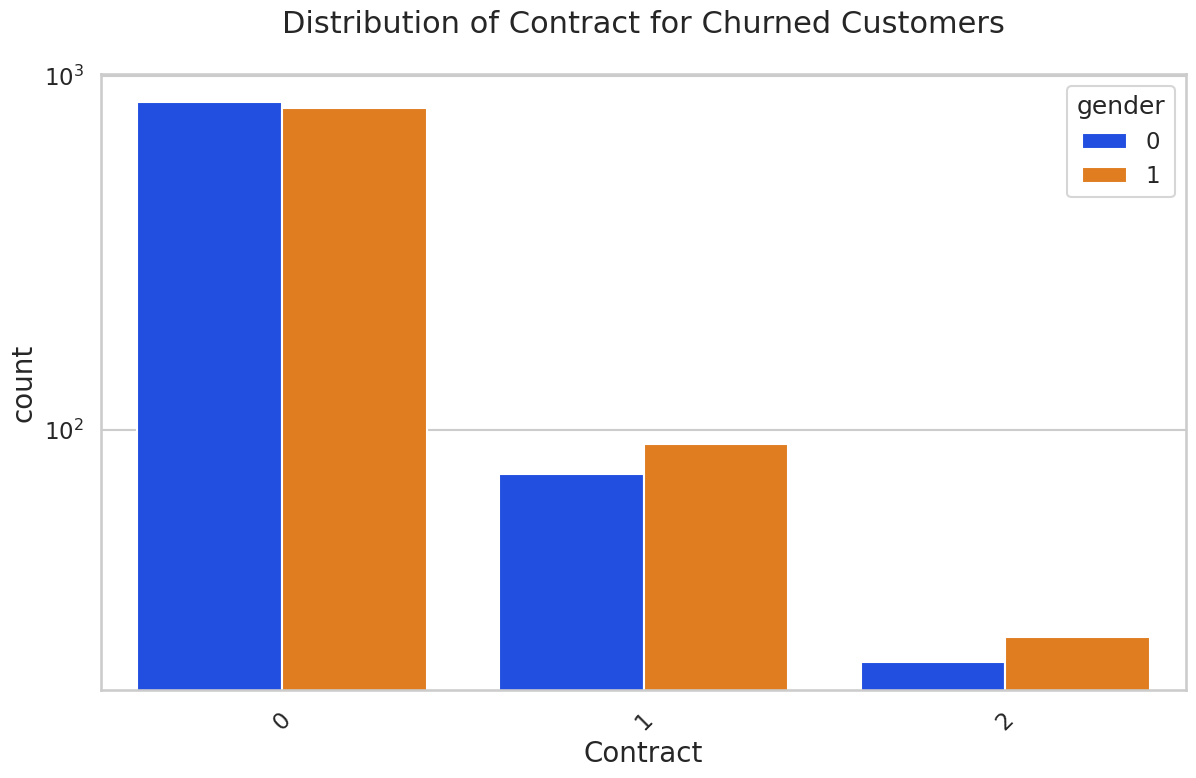

In [36]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

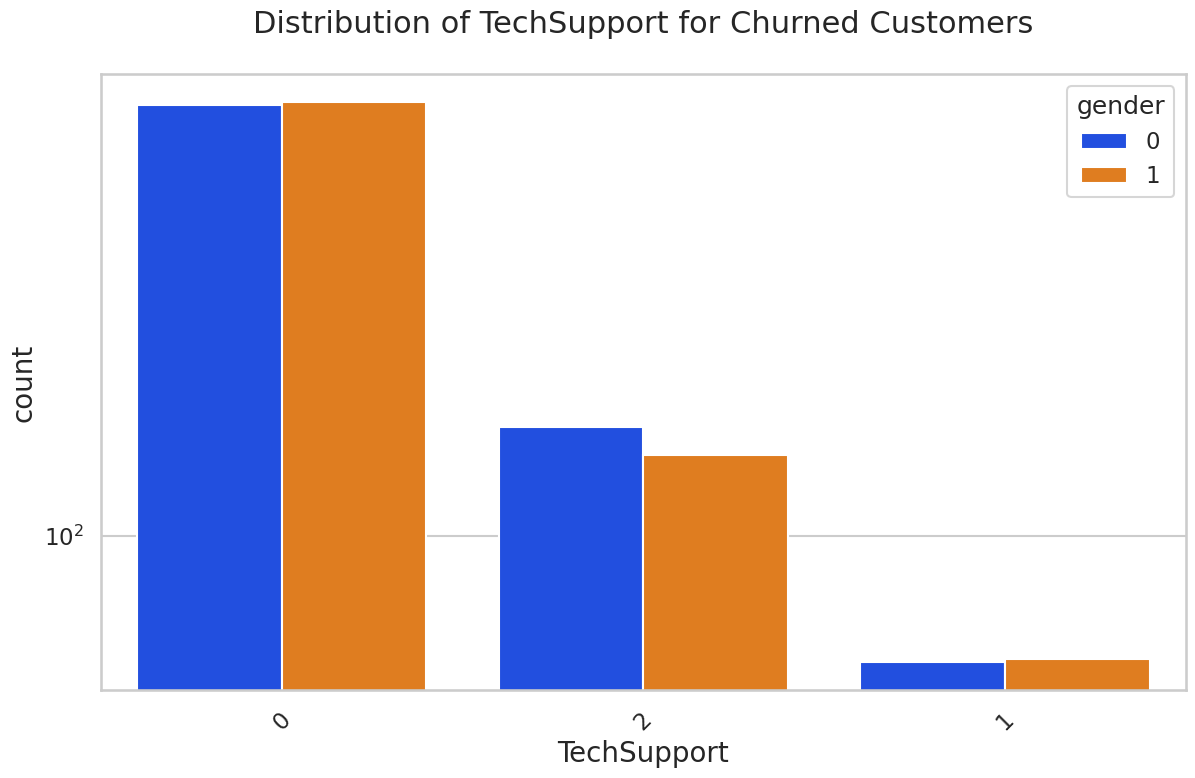

In [37]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

In [38]:
#Importing Libraries
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [39]:

df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [40]:
# We will use the data frame where we had created dummy variables
y = df1['Churn'].values
x = df1.drop(columns = ['Churn'])




<Axes: xlabel='Churn', ylabel='count'>

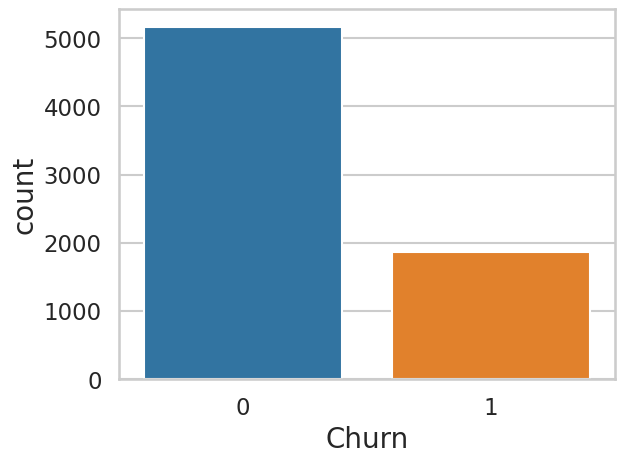

In [41]:
# Check the distribution of the target variable
sns.countplot(x='Churn', data=df1)

In [42]:
from imblearn.over_sampling import RandomOverSampler

In [43]:
ros = RandomOverSampler(random_state=0)
x, y = ros.fit_resample(x, y)

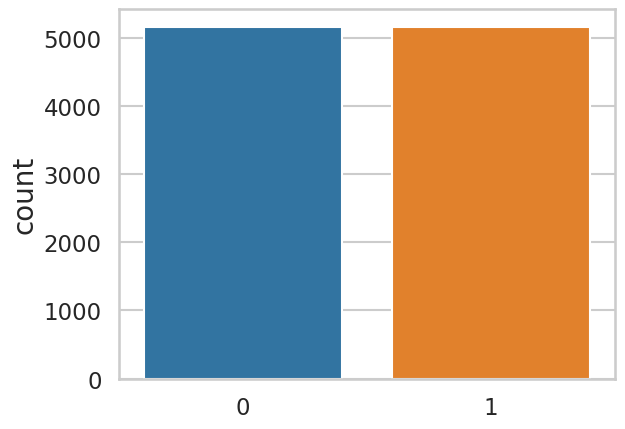

In [44]:
ax = sns.countplot(x=y)

In [45]:
x.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000,10326.000000
mean,0.502421,0.190974,0.442185,0.261766,27.785783,0.905481,0.955065,0.852121,0.659403,0.817451,0.821325,0.663083,0.958067,0.971044,0.512009,0.643134,1.635386,67.804949,2040.724579
std,0.500018,0.393088,0.496670,0.439617,23.994507,0.292563,0.950552,0.676638,0.847450,0.894909,0.895690,0.848920,0.912376,0.912880,0.768509,0.479098,1.018579,28.802613,2179.162969
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,45.300000,273.000000
50%,1.000000,0.000000,0.000000,0.000000,21.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,74.500000,1161.750000
75%,1.000000,0.000000,1.000000,1.000000,49.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,90.800000,3255.100000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000


In [47]:
df2=pd.read_csv('/content/test.csv')

In [48]:
df2.shape

(20, 19)

In [49]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,25,Yes,No,Fiber optic,Yes,no,yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,106.00,2787.00
1,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30.00,30.00
2,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
3,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
4,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [50]:
col1 = df2.columns[df2.dtypes=="object"]

In [51]:
for i in col1:
    un = df2[i].unique()
    print("{} || {}".format(i,un))

gender || ['Male' 'Female']
Partner || ['No' 'Yes']
Dependents || ['No' 'Yes']
PhoneService || ['Yes' 'No']
MultipleLines || ['No' 'No phone service' 'Yes']
InternetService || ['Fiber optic' 'DSL' 'No']
OnlineSecurity || ['Yes' 'No' 'No internet service']
OnlineBackup || ['no' 'Yes' 'No' 'No internet service']
DeviceProtection || ['yes' 'No' 'Yes' 'No internet service']
TechSupport || ['Yes' 'No' 'No internet service']
StreamingTV || ['Yes' 'No' 'No internet service']
StreamingMovies || ['Yes' 'No' 'No internet service']
Contract || ['Month-to-month' 'One year' 'Two year']
PaperlessBilling || ['Yes' 'No']
PaymentMethod || ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [52]:
for i in col1:
    un = df1[i].value_counts()
    print("{} \n {} \n\n".format(i,un))

gender 
 1    3549
0    3483
Name: gender, dtype: int64 


Partner 
 0    3639
1    3393
Name: Partner, dtype: int64 


Dependents 
 0    4933
1    2099
Name: Dependents, dtype: int64 


PhoneService 
 1    6352
0     680
Name: PhoneService, dtype: int64 


MultipleLines 
 0    3385
2    2967
1     680
Name: MultipleLines, dtype: int64 


InternetService 
 1    3096
0    2416
2    1520
Name: InternetService, dtype: int64 


OnlineSecurity 
 0    3497
2    2015
1    1520
Name: OnlineSecurity, dtype: int64 


OnlineBackup 
 0    3087
2    2425
1    1520
Name: OnlineBackup, dtype: int64 


DeviceProtection 
 0    3094
2    2418
1    1520
Name: DeviceProtection, dtype: int64 


TechSupport 
 0    3472
2    2040
1    1520
Name: TechSupport, dtype: int64 


StreamingTV 
 0    2809
2    2703
1    1520
Name: StreamingTV, dtype: int64 


StreamingMovies 
 0    2781
2    2731
1    1520
Name: StreamingMovies, dtype: int64 


Contract 
 0    3875
2    1685
1    1472
Name: Contract, dtype: int64 



In [53]:
col1

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [54]:
for i in col1:
    le = LabelEncoder()
    df2[i] = le.fit_transform(df2[i])

In [55]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,25,1,0,1,2,3,3,2,2,2,0,1,2,106.00,2787.00
1,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,30.00,30.00
2,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
3,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
4,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

Train Test Split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Decision Tree Classifier

In [58]:

model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [59]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [60]:
y_pred=model_dt.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [61]:
model_dt.score(x_test,y_test)

0.7696030977734754

In [62]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1006
           1       0.76      0.81      0.78      1060

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [63]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)


In [64]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [65]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [66]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.8973180076628352
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       579
           1       0.91      0.90      0.91       726

    accuracy                           0.90      1305
   macro avg       0.90      0.90      0.90      1305
weighted avg       0.90      0.90      0.90      1305



In [67]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[518  61]
 [ 73 653]]


Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.
Let's try with some other classifier.

Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [70]:
y_pred=model_rf.predict(x_test)

In [71]:
model_rf.score(x_test,y_test)

0.7913843175217812

In [72]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1006
           1       0.78      0.83      0.80      1060

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



In [73]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x, y)

In [74]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [75]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [76]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [77]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [78]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [79]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.8957854406130268
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       600
           1       0.89      0.91      0.90       705

    accuracy                           0.90      1305
   macro avg       0.90      0.89      0.89      1305
weighted avg       0.90      0.90      0.90      1305



In [80]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[524  76]
 [ 60 645]]


Logistic Regression

In [81]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model_lr= LogisticRegression()
result = model_lr.fit(x_train, y_train)

In [82]:
y_pred=model_lr.predict(x_test)

In [83]:
model_lr.score(x_test,y_test)

0.7792836398838335

In [84]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.74      0.76      1006
           1       0.77      0.82      0.79      1060

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



In [85]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled2, y_resampled2 = sm.fit_resample(x, y)

In [86]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled2, y_resampled2,test_size=0.2)

In [87]:
model_lr_smote=LogisticRegression()

In [88]:
model_lr_smote.fit(xr_train1,yr_train1)

LogisticRegression()

In [89]:
yr_predict1 = model_lr_smote.predict(xr_test1)

In [90]:
model_score_r1 = model_lr_smote.score(xr_test1, yr_test1)

In [91]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.8911877394636015
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       576
           1       0.90      0.90      0.90       729

    accuracy                           0.89      1305
   macro avg       0.89      0.89      0.89      1305
weighted avg       0.89      0.89      0.89      1305



In [92]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[505  71]
 [ 71 658]]


In [93]:
import pickle
# Train a  model and save its parameters to a pickle file
model2 = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model2.fit(xr_test1, yr_test1)
with open('model2.pkl', 'wb') as f:
    pickle.dump(model2, f)


# Load the object from the file
with open('model2.pkl', 'rb') as f:
    model2 = pickle.load(f)




In [94]:
model_score_r1 = model2.score(xr_test1, yr_test1)

In [95]:
print(model_score_r1)

0.9241379310344827
